## Import required packages
we will need tensorflow, numpy, os and keras

In [1]:
import cv2    
import matplotlib.pyplot as plt  
import numpy as np
from IPython.display import display, HTML, clear_output
print(cv2.__version__)
import tensorflow as tf
import os
import numpy as np
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model

4.1.2


Using TensorFlow backend.


## Mount the google drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Read images for each class

Images have been divided into three folders Training, Validation and Testing. (Based on groundtruth Train2, Val2, Test2.txt)
Each of these have folders for every class.

In [0]:
# read image
img1 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Daffodil/image_0035.jpg', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Snowdrop/image_0107.jpg', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/LilyValley/image_0188.jpg', cv2.IMREAD_UNCHANGED)
img4 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Bluebell/image_0270.jpg', cv2.IMREAD_UNCHANGED)
img5 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Crocus/image_0357.jpg', cv2.IMREAD_UNCHANGED)
img6 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Iris/image_0429.jpg', cv2.IMREAD_UNCHANGED)
img7 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Tigerlily/image_0552.jpg', cv2.IMREAD_UNCHANGED)
img8 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Tulip/image_0615.jpg', cv2.IMREAD_UNCHANGED)
img9 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Fritillary/image_0695.jpg', cv2.IMREAD_UNCHANGED)
img10 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Sunflower/image_0750.jpg', cv2.IMREAD_UNCHANGED)
img11 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Daisy/image_0821.jpg', cv2.IMREAD_UNCHANGED)
img12 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/ColtsFoot/image_0918.jpg', cv2.IMREAD_UNCHANGED)
img13 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Dandelion/image_0990.jpg', cv2.IMREAD_UNCHANGED)
img14 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Cowslip/image_1070.jpg', cv2.IMREAD_UNCHANGED)
img15 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Buttercup/image_1147.jpg', cv2.IMREAD_UNCHANGED)
img16 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Windflower/image_1238.jpg', cv2.IMREAD_UNCHANGED)
img17 = cv2.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training/Pansy/image_1310.jpg', cv2.IMREAD_UNCHANGED)

## Plot the images from Flower 17 Dataset

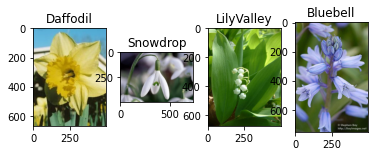

In [0]:
ax1 = plt.subplot(1,4,1)
plt.title("Daffodil")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

ax2 = plt.subplot(1,4,2)
plt.title("Snowdrop")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

ax3 = plt.subplot(1,4,3)
plt.title("LilyValley")
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

ax4 = plt.subplot(1,4,4)
plt.title("Bluebell")
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

## Check the dimension for each class of the dataset

In [0]:
Daffodil = img1.shape
print('Daffodil- Image Dimension : ',Daffodil)

Snowdrop = img2.shape
print('Snowdrop- Image Dimension : ',Snowdrop)

LilyValley = img3.shape
print('LilyValley- Image Dimension : ',LilyValley)

Bluebell = img4.shape
print('Bluebell- Image Dimension : ',Bluebell)

Crocus = img5.shape
print('Crocus- Image Dimension : ',Crocus)

Iris = img6.shape
print('Iris- Image Dimension : ',Iris)

Tigerlily = img7.shape
print('Tigerlily- Image Dimension : ',Tigerlily)

Tulip = img8.shape
print('Tulip- Image Dimension : ',Tulip)

Fritillary = img9.shape
print('Fritillary- Image Dimension : ',Fritillary)

Sunflower = img10.shape
print('Sunflower- Image Dimension : ',Sunflower)

Daisy = img11.shape
print('Daisy- Image Dimension : ',Daisy)

ColtsFoot = img12.shape
print('ColtsFoot- Image Dimension : ',ColtsFoot)

Dandelion = img13.shape
print('Dandelion- Image Dimension : ',Dandelion)

Cowslip = img14.shape
print('Cowslip- Image Dimension : ',Cowslip)

Buttercup = img15.shape
print('Buttercup- Image Dimension : ',Buttercup)

Windflower = img16.shape
print('Windflower- Image Dimension : ',Windflower)

Pansy = img17.shape
print('Pansy- Image Dimension : ',Pansy)

Daffodil- Image Dimension :  (670, 500, 3)
Snowdrop- Image Dimension :  (500, 735, 3)
LilyValley- Image Dimension :  (675, 500, 3)
Bluebell- Image Dimension :  (751, 500, 3)
Crocus- Image Dimension :  (500, 802, 3)
Iris- Image Dimension :  (500, 529, 3)
Tigerlily- Image Dimension :  (732, 500, 3)
Tulip- Image Dimension :  (636, 500, 3)
Fritillary- Image Dimension :  (500, 542, 3)
Sunflower- Image Dimension :  (499, 499, 3)
Daisy- Image Dimension :  (500, 666, 3)
ColtsFoot- Image Dimension :  (500, 504, 3)
Dandelion- Image Dimension :  (500, 570, 3)
Cowslip- Image Dimension :  (510, 499, 3)
Buttercup- Image Dimension :  (500, 585, 3)
Windflower- Image Dimension :  (500, 596, 3)
Pansy- Image Dimension :  (560, 500, 3)


# VGG as Base Model

## Create the VGG 16 architecture

In [0]:
model = tf.keras.models.Sequential([

# block 1                                  
tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 2  
tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 3  
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 4  
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 5  
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=4096,activation="relu"),
tf.keras.layers.Dense(units=4096,activation="relu"),
tf.keras.layers.Dense(units=17, activation="softmax")

])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

## Checkpointing


In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/tmp/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=4)

## Training CNN with ImageDataGenerator

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Validation',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [61]:
import time
start = time.time()
e = 100

history = model.fit_generator(
      train_generator,
      steps_per_epoch= 34,  
      epochs= e,
      verbose= 1,
      validation_data = validation_generator,
      callbacks = [checkpoint],
      validation_steps= 17)

end = time.time()
duration = end - start
print ('\n model_scratch took %0.2f seconds (%0.1f minutes) to t rain for %d epochs'%(duration, duration/60, e) )

Epoch 1/100
34/34 [==============================] - 28s 812ms/step - loss: 2.8867 - accuracy: 0.0324 - val_loss: 2.8150 - val_accuracy: 0.0765
Epoch 2/100
34/34 [==============================] - 28s 810ms/step - loss: 2.8270 - accuracy: 0.0912 - val_loss: 2.5223 - val_accuracy: 0.1059
Epoch 3/100
34/34 [==============================] - 28s 814ms/step - loss: 2.3975 - accuracy: 0.1824 - val_loss: 2.2608 - val_accuracy: 0.1912
Epoch 4/100
34/34 [==============================] - 28s 813ms/step - loss: 2.1972 - accuracy: 0.2103 - val_loss: 2.1122 - val_accuracy: 0.2824
Epoch 5/100
34/34 [==============================] - 28s 815ms/step - loss: 1.9152 - accuracy: 0.3250 - val_loss: 2.0462 - val_accuracy: 0.3118
Epoch 6/100
34/34 [==============================] - 28s 815ms/step - loss: 1.7472 - accuracy: 0.3794 - val_loss: 2.0026 - val_accuracy: 0.3765
Epoch 7/100
34/34 [==============================] - 28s 815ms/step - loss: 1.4874 - accuracy: 0.4971 - val_loss: 2.1101 - val_accuracy:

## Visualization of results and identification of overfitting

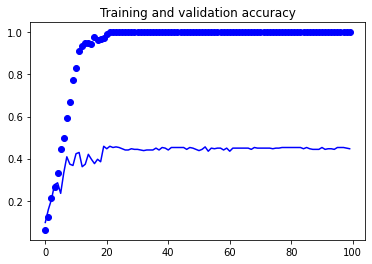

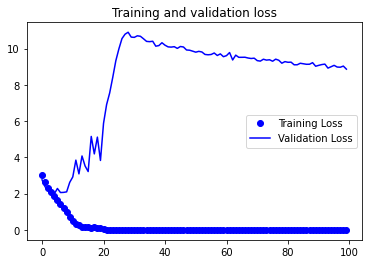

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**`The model is clearly overfitting after 20 epochs`**

---
Epoch 20/100
34/34 [==============================] - 22s 658ms/step - loss: 0.1244 - accuracy: 0.9735 - val_loss: 3.8298 - val_accuracy: 0.4588


---



## Loading the weights of trained model from 20th epoch

In [0]:
## Go to the /tmp folder and copy the name of the last saved model
model_modify=tf.keras.models.load_model('/tmp/weights.20-3.83.hdf5')

## Testing the model

In [19]:
testing_datagen = ImageDataGenerator(rescale=1/255)

testing_generator = testing_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentr
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:
model_modify.evaluate(testing_generator)

17/17 [==============================] - 148s 9s/step - loss: 3.3560 - accuracy: 0.4412


[3.355973243713379, 0.44117647409439087]

Predicted: Crocus
Actual: Bluebell


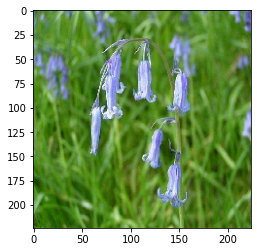

In [48]:
from keras.preprocessing import image
img = image.load_img("/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Testing/Bluebell/image_0280.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
classes = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily','Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'Pansy', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']

for i in range(0,17):
  if output[0][i] == 1:
    print("Predicted: " + classes[i])
    print("Actual: Bluebell")

# Customization on Base VGG Model

## Create the Customized VGG 16 architecture

In [0]:
model = tf.keras.models.Sequential([

# block 1                                    
tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 2
tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 3
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

# block 4
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
tf.keras.layers.Dropout(0.5),

# block 5
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=4096,activation="relu"),
tf.keras.layers.Dense(units=4096,activation="relu"),
tf.keras.layers.Dense(units=17, activation="softmax")

])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     1

## Checkpointing


In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/tmp/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=4)

## Training CNN with ImageDataGenerator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Validation',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [0]:
import time
start = time.time()
e = 100           #100 epochs

history = model.fit_generator(
      train_generator,
      steps_per_epoch= 34,        # 680/20 = 34
      epochs= e,
      verbose= 1,
      validation_data = validation_generator,
      # callbacks = [checkpoint],
      validation_steps= 17)       # 340/20 = 17

end = time.time()
duration = end - start
print ('\n model_scratch took %0.2f seconds (%0.1f minutes) to t rain for %d epochs'%(duration, duration/60, e) )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
34/34 [==============================] - 627s 18s/step - loss: 2.8346 - accuracy: 0.0456 - val_loss: 2.8332 - val_accuracy: 0.0588
Epoch 2/100
34/34 [==============================] - 17s 497ms/step - loss: 2.8336 - accuracy: 0.0485 - val_loss: 2.8332 - val_accuracy: 0.0588
Epoch 3/100
34/34 [==============================] - 17s 501ms/step - loss: 2.8345 - accuracy: 0.0412 - val_loss: 2.8332 - val_accuracy: 0.0588
Epoch 4/100
34/34 [==============================] - 17s 493ms/step - loss: 2.8336 - accuracy: 0.0426 - val_loss: 2.8329 - val_accuracy: 0.0588
Epoch 5/100
34/34 [==============================] - 17s 493ms/step - loss: 2.8688 - accuracy: 0.0515 - val_loss: 2.8306 - val_accuracy: 0.0618
Epoch 6/100
34/34 [==============================] - 17s 493ms/step - loss: 2.7216 - accuracy: 0.0956 - val_loss: 2.5836 - val_accuracy: 0.1176
Epoch 7/100
34/34 [==============================] - 17s 492m

## Visualization of results and identification of overfitting

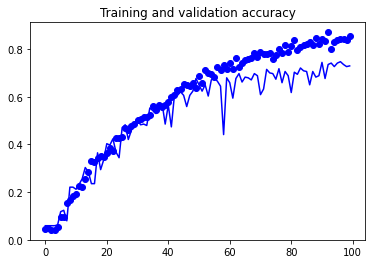

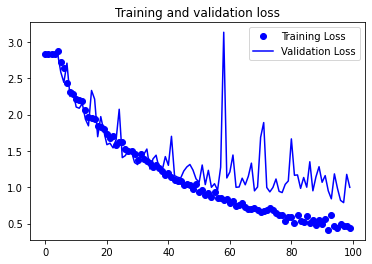

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Loading the weights of trained model from 100th epoch

In [0]:
## Go to the /tmp folder and copy the name of the last saved model
model_modify=tf.keras.models.load_model('/tmp/weights.100-3.83.hdf5')

## Testing the model

In [0]:
testing_datagen = ImageDataGenerator(rescale=1/255)

testing_generator = testing_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 64X64
        batch_size=20,
        # Since we use binary_crossentr
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:
model.evaluate(testing_generator)

17/17 [==============================] - 170s 10s/step - loss: 0.9453 - accuracy: 0.7382


[0.9452807903289795, 0.7382352948188782]

Predicted: Crocus
Actual: Iris


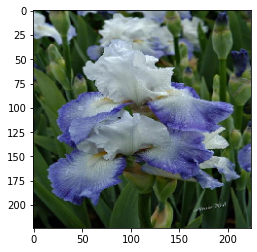

In [55]:
from keras.preprocessing import image
img = image.load_img("/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-2/Final Flower Dataset/Testing/Iris/image_0440.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
classes = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily','Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'Pansy', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']

for i in range(0,17):
  if output[0][i] == 1:
    print("Predicted: " + classes[i])
    print("Actual: Iris")